![](https://api.brandy.run/core/core-logo-wide)

# Supervised Learning: Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import seaborn as sns

In [2]:
# To hide warnings on the jupyter
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/fish.csv")

In [4]:
df = df[df["Weight"]>0]

In [5]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
df.shape

(158, 7)

In [8]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [16]:
y = df["Weight"]
X = df.drop(columns=["Weight"])

In [17]:
X["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [18]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 158, dtype: float64

In [19]:
X

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


## Train Test Split

Como visto en la lección anterior, la división de los datos en train y test es una buena herramienta para evitar el overfitting.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((126, 6), (32, 6), (126,), (32,))

In [23]:
X_train

,Species,Length1,Length2,Length3,Height,Width
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
126,Perch,40.2,43.5,46.0,12.6040,8.1420
23,Bream,31.8,35.0,40.6,15.4686,6.1306
75,Perch,15.0,16.2,17.2,4.5924,2.6316
18,Bream,30.9,33.5,38.6,15.6330,5.1338
...,...,...,...,...,...,...
8,Bream,27.6,30.0,35.1,14.0049,4.8438
15,Bream,29.4,32.0,37.2,15.4380,5.5800
144,Pike,59.0,63.4,68.0,10.8120,7.4800
148,Smelt,10.4,11.0,12.0,2.1960,1.3800


In [24]:
y_train

156      12.2
126    1000.0
23      680.0
75       51.5
18      610.0
        ...  
8       450.0
15      600.0
144    1650.0
148       9.7
37       78.0
Name: Weight, Length: 126, dtype: float64

## How to deal with Categorical data?

> ### Choose a Strategy
> #### LabelEncoding <a class="tocSkip">
> Una posible estratégia para las variables categóricas es convertirlas a clases numericas ordinales, por ejemplo asignando valores entre 0 y `n_classes - 1`. 

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
enc = LabelEncoder()

In [27]:
# .fit para generar la relación categoria -> numero
enc.fit(X_train["Species"])

LabelEncoder()

In [32]:
X_train["Species"]

156    Smelt
126    Perch
23     Bream
75     Perch
18     Bream
       ...  
8      Bream
15     Bream
144     Pike
148    Smelt
37     Roach
Name: Species, Length: 126, dtype: object

In [29]:
enc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [33]:
X_train["Species_"] = enc.transform(X_train["Species"])

In [34]:
type(X_train["Species_"])

pandas.core.series.Series

In [35]:
X_train

,Species,Length1,Length2,Length3,Height,Width,Species_
156,Smelt,12.1,13.0,13.8,2.2770,1.2558,5
126,Perch,40.2,43.5,46.0,12.6040,8.1420,2
23,Bream,31.8,35.0,40.6,15.4686,6.1306,0
75,Perch,15.0,16.2,17.2,4.5924,2.6316,2
18,Bream,30.9,33.5,38.6,15.6330,5.1338,0
...,...,...,...,...,...,...,...
8,Bream,27.6,30.0,35.1,14.0049,4.8438,0
15,Bream,29.4,32.0,37.2,15.4380,5.5800,0
144,Pike,59.0,63.4,68.0,10.8120,7.4800,3
148,Smelt,10.4,11.0,12.0,2.1960,1.3800,5


In [36]:
X_train[["Species","Species_"]]

,Species,Species_
156,Smelt,5
126,Perch,2
23,Bream,0
75,Perch,2
18,Bream,0
...,...,...
8,Bream,0
15,Bream,0
144,Pike,3
148,Smelt,5


In [ ]:
LabelEncoder().fit_transform(X_train["Species"])

### Important! <a class="tocSkip">
    
Cuando utilicemos una herramienta como el `LabelEncoder`, debemos utilizar la misma instáncia de esa herramienta en ambos X_train y X_test. El motivo es que al llamar el método `.fit`, estamos configurando parámetros en ese objeto. 
    
Si no utilizaramos el mismo Encoder, no poderíamos asegurarnos que la misma clase tendría la misma etiqueta (numero).

In [37]:
enc.transform(X_test["Species"])

array([0, 4, 3, 2, 2, 0, 0, 2, 0, 2, 6, 2, 2, 2, 2, 4, 5, 4, 1, 3, 3, 2,
       2, 2, 6, 4, 2, 2, 3, 0, 2, 4])

### Problems with LabelEncoding <a class="tocSkip">
    
Hay entretanto un problema con esa transformación. Al asignar valores ordenados, estabelecemos que las diferentes clases están distribuidas en ese orden.

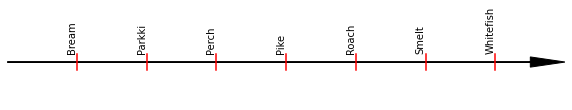

In [38]:
scale = plt.figure(figsize=(10,1.5))
for i,txt in enumerate(enc.classes_):
    plt.text(i,.05,txt, rotation="vertical", ha='right')
    plt.axvline(i,.4,.6, color="red")
plt.xlim(-1,7)
plt.ylim(-.2,.2)
plt.axis('off')
plt.arrow(-1, 0, 8, 0, length_includes_head=True, head_width=.05, head_length=.5, color="k");

Como muchos algoritmos se basean en la geometria y la distribución de los data points en el espacio, esa información de como se distribuyen las clases le pasa información que no es correcta. Por ejemplo, que `Bream` se asemeja más a `Parkki` que `Whitefish` en el caso de los pescados.

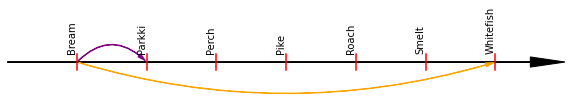

In [39]:
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
colors= ["purple","orange"]
conn = ["arc3,rad=-.5","arc3,rad=.15"]
arrows = [patches.FancyArrowPatch((0, 0), (x, 0),connectionstyle=conn[i], 
                                  arrowstyle=style, color=colors[i]) for i,x in enumerate([1,6])]
[scale.gca().add_patch(a) for a in arrows]
scale

In [40]:
le = LabelEncoder()

In [41]:
classes = ["Pequeño", "Medio", "Grande", "Extra Grande", "Extra Pequeño"]

In [42]:
le.fit_transform(classes)

array([4, 3, 2, 0, 1])

In [43]:
le.classes_

array(['Extra Grande', 'Extra Pequeño', 'Grande', 'Medio', 'Pequeño'],
      dtype='<U13')

In [44]:
le = LabelEncoder()

In [45]:
classes = ["Extra Pequeño", "Pequeño", "Medio", "Grande", "Extra Grande"]

In [46]:
le.classes_ = classes

In [47]:
le.classes_

['Extra Pequeño', 'Pequeño', 'Medio', 'Grande', 'Extra Grande']

In [48]:
le.transform(classes)

array([0, 1, 2, 3, 4])

Mientras el LabelEncoding puede ser una alternativa cuando las categorias pueden ser ordenadas `Malo, Medio, Bueno`, `XS, S, M, L, XL`, eso no será siempre el caso. Para eso, tenemos otra herramienta, el `OneHotEncoding`. 

> #### OneHotEncoding <a class="tocSkip">
> En ese caso, cada una de las posibles clases se tornará una columna nueva en el dataframe y se asignaran valores `0` y `1` segun aquella fila (o data point) sea de esa clase o no. A las variables que se codifican de esa manera, también se las llama `dummy variables`.

In [49]:
abc = pd.DataFrame(["a","b","c"], columns=["letter"])
abc

,letter
0,a
1,b
2,c


In [50]:
abc.join(pd.get_dummies(abc))

,letter,letter_a,letter_b,letter_c
0,a,1,0,0
1,b,0,1,0
2,c,0,0,1


Al tratar cada variable separadamente y de manera binaria, dejamos de tener el problema del orden de las clases.

In [51]:
X_train = X_train.drop(columns=["Species_"])

In [52]:
X_train

,Species,Length1,Length2,Length3,Height,Width
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
126,Perch,40.2,43.5,46.0,12.6040,8.1420
23,Bream,31.8,35.0,40.6,15.4686,6.1306
75,Perch,15.0,16.2,17.2,4.5924,2.6316
18,Bream,30.9,33.5,38.6,15.6330,5.1338
...,...,...,...,...,...,...
8,Bream,27.6,30.0,35.1,14.0049,4.8438
15,Bream,29.4,32.0,37.2,15.4380,5.5800
144,Pike,59.0,63.4,68.0,10.8120,7.4800
148,Smelt,10.4,11.0,12.0,2.1960,1.3800


In [57]:
X_train = pd.get_dummies(X_train, prefix="", prefix_sep="")

In [58]:
X_train.head()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
126,40.2,43.5,46.0,12.6040,8.1420,0,0,1,0,0,0,0
23,31.8,35.0,40.6,15.4686,6.1306,1,0,0,0,0,0,0
75,15.0,16.2,17.2,4.5924,2.6316,0,0,1,0,0,0,0
18,30.9,33.5,38.6,15.6330,5.1338,1,0,0,0,0,0,0


In [59]:
X_train.shape

(126, 12)

In [60]:
# With scikit-learn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [65]:
X_train["Species"]

49      Roach
6       Bream
9       Bream
69     Parkki
151     Smelt
        ...  
75      Perch
14      Bream
156     Smelt
18      Bream
52      Roach
Name: Species, Length: 118, dtype: object

In [64]:
type(X_train[["Species"]])

pandas.core.frame.DataFrame

In [66]:
ohe.fit(X_train[["Species"]])

OneHotEncoder()

In [67]:
ohe.categories_

[array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object)]

In [68]:
encoded_species_train = ohe.transform(X_train[["Species"]])

In [69]:
encoded_species_train

<118x7 sparse matrix of type '<class 'numpy.float64'>'
	with 118 stored elements in Compressed Sparse Row format>

In [71]:
X_train

,Species,Length1,Length2,Length3,Height,Width
49,Roach,22.0,23.4,26.7,6.9153,3.6312
6,Bream,26.8,29.7,34.5,14.1795,5.2785
9,Bream,28.5,30.7,36.2,14.2266,4.9594
69,Parkki,21.2,23.0,25.8,10.3458,3.6636
151,Smelt,11.3,11.8,13.1,2.2139,1.2838
...,...,...,...,...,...,...
75,Perch,15.0,16.2,17.2,4.5924,2.6316
14,Bream,29.4,32.0,37.2,14.9544,5.1708
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
18,Bream,30.9,33.5,38.6,15.6330,5.1338


In [70]:
encoded_species_train.todense()[:10]

matrix([[0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])

In [72]:
encoded_species_train = pd.DataFrame(encoded_species_train.todense(), index=X_train.index)
pd.concat([X_train, encoded_species_train], axis=1)

,Species,Length1,Length2,Length3,Height,Width,0,1,2,3,4,5,6
49,Roach,22.0,23.4,26.7,6.9153,3.6312,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Bream,26.8,29.7,34.5,14.1795,5.2785,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Bream,28.5,30.7,36.2,14.2266,4.9594,1.0,0.0,0.0,0.0,0.0,0.0,0.0
69,Parkki,21.2,23.0,25.8,10.3458,3.6636,0.0,1.0,0.0,0.0,0.0,0.0,0.0
151,Smelt,11.3,11.8,13.1,2.2139,1.2838,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Perch,15.0,16.2,17.2,4.5924,2.6316,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,Bream,29.4,32.0,37.2,14.9544,5.1708,1.0,0.0,0.0,0.0,0.0,0.0,0.0
156,Smelt,12.1,13.0,13.8,2.2770,1.2558,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,Bream,30.9,33.5,38.6,15.6330,5.1338,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
species_ohe_test = ohe.transform(X_test[["Species"]]).todense()
species_ohe_test = pd.DataFrame(species_ohe_test, index=X_test.index)
pd.concat([X_test, species_ohe_test], axis=1).head()

,Species,Length1,Length2,Length3,Height,Width,0,1,2,3,4,5,6
103,Perch,25.4,27.5,28.9,7.1672,4.3350,0.0,0.0,1.0,0.0,0.0,0.0,0.0
71,Parkki,24.0,26.0,29.0,11.3680,4.2340,0.0,1.0,0.0,0.0,0.0,0.0,0.0
60,Whitefish,37.3,40.0,43.5,12.3540,6.5250,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,Bream,28.7,31.0,36.2,14.3714,4.8146,1.0,0.0,0.0,0.0,0.0,0.0,0.0
132,Pike,35.5,38.0,40.5,7.2900,4.5765,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [74]:
pd.get_dummies(X_test.iloc[:5])

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Whitefish
103,25.4,27.5,28.9,7.1672,4.3350,0,0,1,0,0
71,24.0,26.0,29.0,11.3680,4.2340,0,1,0,0,0
60,37.3,40.0,43.5,12.3540,6.5250,0,0,0,0,1
11,28.7,31.0,36.2,14.3714,4.8146,1,0,0,0,0
132,35.5,38.0,40.5,7.2900,4.5765,0,0,0,1,0


In [75]:
ohe.transform(X_test.iloc[:5][["Species"]]).todense()

matrix([[0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.]])

In [76]:
species = X_test.iloc[:5]["Species"]
cat = ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
species = species.astype(pd.CategoricalDtype(categories=cat))

In [77]:
pd.get_dummies(species)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
103,0,0,1,0,0,0,0
71,0,1,0,0,0,0,0
60,0,0,0,0,0,0,1
11,1,0,0,0,0,0,0
132,0,0,0,1,0,0,0


### Important! <a class="tocSkip">
    
Como en el encoder anterior, con el OneHotEncoder también es importante utilizar la misma instancia del encoder.

Seguiremos el ejemplo, utilizando `pd.get_dummies`.

In [78]:
X_dummies = pd.get_dummies(X, columns=["Species"])

In [79]:
X_dummies

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y)

In [86]:
X_train.shape

(118, 12)

In [90]:
y_test[:5]

134     456.0
135     510.0
125    1100.0
5       450.0
130     300.0
Name: Weight, dtype: float64

In [91]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [92]:
lr = LinearRegression()

In [93]:
lr.fit(X_train, y_train)

LinearRegression()

In [94]:
lr.coef_

array([ -70.1305346 ,   67.40526148,   28.85423363,   17.22513994,
         11.48217768, -157.50467767,   45.80152753,   31.09095285,
       -200.91885488,   -9.95820719,  343.74872119,  -52.25946183])

In [95]:
X_test

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
134,40.0,42.5,45.5,7.2800,4.3225,0,0,0,1,0,0,0
135,40.0,42.5,45.5,6.8250,4.4590,0,0,0,1,0,0,0
125,40.1,43.0,45.5,12.5125,7.4165,0,0,1,0,0,0,0
5,26.8,29.7,34.7,13.6024,4.9274,1,0,0,0,0,0,0
130,32.7,35.0,38.8,5.9364,4.3844,0,0,0,1,0,0,0
60,37.3,40.0,43.5,12.3540,6.5250,0,0,0,0,0,0,1
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
45,20.5,22.5,25.3,7.0334,3.8203,0,0,0,0,1,0,0
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
17,30.4,33.0,38.5,14.9380,5.1975,1,0,0,0,0,0,0


In [96]:
lr.predict(X_test)

array([ 580.31540233,  574.04528091,  964.67118983,  490.88936014,
        370.97252724,  804.79547425,  271.61320282,  197.84665661,
         32.08115561,  596.61011937,  877.61985272,  853.52594528,
         61.27724392,  368.26752196,   -9.53445831,  765.06983978,
        340.36022803,  496.24857015,  244.98486774,   56.22780108,
        239.35761286,   55.88593554,  893.42072504,  430.24286835,
        160.38338063,  239.61199674, 1232.49935813,  276.87117243,
        493.47342529,  350.9460986 ,  342.38111998,  160.92863561,
         10.00170078,  526.53716823,  699.25541834, -165.47798623,
       1147.69427872,  736.80750305,  965.46919915,  398.25747266])

In [97]:
X_test.shape

(40, 12)

In [98]:
unknown_datapoint = np.array([X_test.iloc[0]])
print(unknown_datapoint)
lr.predict(unknown_datapoint)

[[40.     42.5    45.5     7.28    4.3225  0.      0.      0.      1.
   0.      0.      0.    ]]


/Users/core_school/miniconda3/envs/core/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([580.31540233])

In [100]:
# RMSE
rmse_train = mse(y_train, lr.predict(X_train))**.5
rmse_test = mse(y_test, lr.predict(X_test))**.5

In [101]:
pd.DataFrame({
    "error_train":[rmse_train],
    "error_test":[rmse_test]
})

,error_train,error_test
0,88.074476,103.039708


In [102]:
pd.DataFrame({0:{
    "error_train":rmse_train,
    "error_test":rmse_test
}})

,0
error_test,103.039708
error_train,88.074476


## Checking our results

### Parity Plot

Además de las metricas de los errores, hay otras herramientas que nos pueden ayudar a visualizar el comportamiento de nuestros modelos. Por ejemplo, podemos hacer una grafica comparando predicciones (`y_pred`) y ground truth (`y`). Además, una recta diagonal nos ayuda a identificar los puntos de mayor error. Un modelo perfecto representaria esa própria diagonal.

In [103]:
y_pred_train = lr.predict(X_train)

In [104]:
maxi = max([y_pred_train.max(), y_train.max()])
mini = min([y_pred_train.min(), y_train.min()])

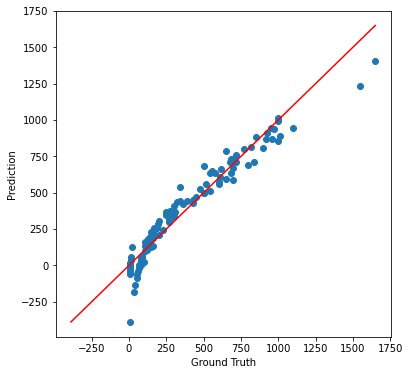

In [105]:
# Los parity plots se ven mejor cuando son cuadrados
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_pred_train)
plt.plot([mini,maxi],[mini,maxi], color="red")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction");

### Loss function
Otra manera interesante de valorar los resultados de nuestro modelo és la función de perdida, la manera como el error varia en función de algún parámetro. Para eso, necesitamos utilizar un modelo que tenga algún parámetro.

In [ ]:
# Usando Sklearn, la regresión polinomial es una regresión lineal en que incluimos features polinomicas.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#### What does adding Polynomial features mean?

In [ ]:
X1 = np.linspace(0,5,20)
Y = X1**2 +2
Y_INV = np.sqrt(Y-2)
plt.plot(X1,Y, color="red")
plt.plot(X1,Y_INV, color="blue")
plt.legend(["Polydata","Lineal"])

In [ ]:
Y

In [ ]:
pf = PolynomialFeatures(degree=2)

In [ ]:
X_train.shape

In [ ]:
Z = pf.fit_transform(X_train)

In [ ]:
X_train

In [ ]:
pd.DataFrame(Z).iloc[:, 10:20]

In [ ]:
X_train

Podemos ver en el ejemplo arriba, que hay más `features` (columnas) en el resultado de la transformación. Podemos pensar en la ecuación de un polinomio como en la de una recta, pero que en lugar de tener apenas la variable $x$, tenemos también sus potencias `x^2, x^3, etc`.

#### Line Equation <a class="tocSkip"/>
- Recta de 2 dimensiones (recta sobre un plano)
> $y = mx + b$



In [ ]:
x = np.linspace(-100,100,200)
line = lambda m,b,x : m*x + b
y_ = line(3,5,x)
plt.plot(x,y_)

#### Polynomial Equation <a class="tocSkip"/>
- Polinomio de 2 dimensiones (sobre un plano)

Como vamos añadir las features polinomicas ($x^2,x^3,x^4,...,x^n$), debemos decidir cual es el valor máximo n de las potencias en nuestro polinomio. Ese valor representa el `grado` de nuestro polinomio.
- Grado 2
$$y = m_2x^2 + mx + b $$

Mejor representado como:

$$f(x) = \alpha_2 x^2 + \alpha_1 x^1 + \alpha_0 x^0$$

O de forma universal como

$$f(x) = \sum_{i=k}^{0} m_{i}x^i$$

In [ ]:
poly_features = lambda deg, x: [x**i for i in range(0,deg+1)][::-1]
poly_features(4,2)

In [ ]:
polynomial = lambda coef, poly_x: sum([alpha*x for alpha,x in zip(coef,poly_x)])

In [ ]:
coef = [3,5]
x = np.linspace(-100,100,200)
y_ = polynomial(coef,poly_features(1,x))

In [ ]:
plt.plot(x,y_)

In [ ]:
# Polinomio de grado 2 = Parábola
coef = [3,0,0]
y_ = polynomial(coef, poly_features(2,x))
plt.plot(x,y_)

De esa manera, podemos combinar diferentes polinomios de diferentes ordenes para componer curvas más complejas que pueden representar mejor los datos que queremos modelar en una regresión.

In [ ]:
coef = [ [5e-8,0,0,0,0] , [0,0,-4e-4,0,0] , [0,0,0,1e-2,0] , [5e-8,0,-4e-4,1e-2,0] ]
names = [ "4_degree" , "2_degree" , "1_degree" , "sum" ]
plt.figure(figsize=(12,3))
for i in range(4):
    plt.subplot(1,4,i+1)
    y_ = polynomial(coef[i], poly_features(4,x))
    plt.title(names[i])
    plt.plot(x,y_)

### More dimensions <a class="tocSkip"/>

En el ejemplo arriba, vemos esa composición con apenas 2 dimensiones, pero también es lo mismo para más dimensiones!

## Polynomial Regression of different degrees

In [ ]:
error_train = []
error_test = []

degrees = range(1,11)

for deg in degrees:
    # Step1: From original features, generate polynomial ones both in train and test datasets
    pf = PolynomialFeatures(degree=deg)
    X_train_poly = pf.fit_transform(X_train)
    X_test_poly = pf.transform(X_test)
    
    # Step2: Train the model
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    
    # Step3: Measure the results (RMSE)
    error_train.append(mse(y_train, lr.predict(X_train_poly))**.5)
    error_test.append(mse(y_test, lr.predict(X_test_poly))**.5)

In [ ]:
error_train

In [ ]:
errors = []
degrees = range(1,10)


def get_pipeline(**hyperparms):
    print(f"Configured pipeline with hyperparams {hyperparms}")
    degree = hyperparms["degree"]
    
    lr = LinearRegression()
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree)),
        ("linear", lr)
    ])
    return model, lr
    
def metrics(X_train,X_test,y_train,y_test):
    train_rmse = mse(y_train, model.predict(X_train))**.5
    test_rmse = mse(y_test, model.predict(X_test))**.5

    return {"train_mse":train_rmse, "test_mse":test_rmse}

for deg in degrees:
    model,lr = get_pipeline(degree=deg)
    model.fit(X_train,y_train)
    print(f"\tNumber of training features -> {lr.n_features_in_}")
    errors.append(metrics(X_train,X_test,y_train,y_test))



In [ ]:
errors

In [ ]:
df = pd.DataFrame(errors)
#plt.plot(degrees, df["train_mse"], label="train")
#plt.plot(degrees, df["test_mse"], label="test")
#plt.title("Loss Function")
#plt.yscale("log")
#plt.legend();

sns.lineplot(data=df)
plt.yscale("log")

## What causes the Error?
Si intentaramos encontrar una formula genérica para cualquier modelo, encontraríamos lo siguiente:

$$
ŷ = f(x) + ε
$$

Donde el valor `ε` representa el error del modelo. Por su parte, ese error podríamos decompor en tres partes:

$$
ε = (Bias[ f(x) ])² + Var[ f(x) ] + σ²
$$

- Bias
- Variance
- Irreductible Error 

Entendamos cada uno de eses puntos:

### Irreductible Error
Esa parte del error es aquella que no podemos reducir alterando el modelo, sea un problema del proceso de recogida de datos, variación natural de las cosas, etc. Al final ese error se debe al fato de que `ningun modelo es perfecto`.

### Bias and Variance
El Bias y la Varianza representan dos características que pueden afectar los resultados de nuestro modelo. Podemos verlo con una analogia:

<img src="img/bias_variance.png">

### What is the catch? <a class="tocSkip">
    
- No se pueden calcular los verdaderos valores para los errores de Bias y Variance
- Bias y Variance están en una balanza, bajar uno significa subir el otro.
    
![](img/tradeoff.png)

### Consequences <a class="tocSkip">
    
- `High Bias`: Underfit model
- `High Variance`: Overfit model

## Regularization

Como visto anteriormente, el Bias y la Varianza resultan en problemas distintos en nuestro modelo. A princípio, el Bias es un problema de mas fácil solución, pues significa que necesitamos más complexidad en nuestro modelo. 
    
Para evitar el overfit, hay una herramienta muy interessante, que es la `Regularización`. Especificamente las regularizaciones L1 y L2.

- Podéis encontrar una descripción detallada de las regularizaciones L1 y L2 en [ese artículo](https://arunm8489.medium.com/an-overview-on-regularization-f2a878507eae)

### L1 Lasso

La regularización del tipo LASSO (`Least Absolute Shrinkage And Selection Operator`) es una técnica en que se añade una penalización a la suma de los valores de los coeficientes, por lo cual se bajan los valores de los coeficientes, incluso a cero, evitando una grande varianza.

Sus características, sengún el artículo mencionado:

- L1 penalizes sum of absolute value of weights.
- L1 has a sparse solution
- L1 generates model that are simple and interpretable but cannot learn complex patterns
- L1 is robust to outliers

### L2 Ridge

- L2 regularization penalizes sum of square weights.
- L2 has a non sparse solution
- L2 regularization is able to learn complex data patterns
- L2 has no feature selection
- L2 is not robust to outliers

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# Alpha ==0 -> LinearRegression
errors = pd.DataFrame()

alphas = list(range(11)) + [50, 100]
coef_lasso = {}
coef_ridge = {}
for alpha in alphas:
    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_train = mse(y_train, lasso.predict(X_train))**.5
    lasso_test = mse(y_test, lasso.predict(X_test))**.5
    coef_lasso[alpha] = lasso.coef_
    
    
    
    # Ridge
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X_train, y_train)
    ridge_train = mse(y_train, ridge.predict(X_train))**.5
    ridge_test = mse(y_test, ridge.predict(X_test))**.5
    coef_ridge[alpha] = ridge.coef_
    
    errors = errors.append(pd.Series({
        "Lasso_train": lasso_train,
        "Lasso_test": lasso_test,
        "Ridge_train": ridge_train,
        "Ridge_test": ridge_test,
    }, name=alpha))

In [ ]:
errors

In [ ]:
coef_lasso[5]

In [ ]:
coef_ridge[5]

In [ ]:
errors = pd.DataFrame()
alphas = [*range(11),50,100]
coef_lasso = {}
coef_ridge = {}
for alpha in alphas:
    #LASSO
    lasso = Pipeline([
        ("poly",PolynomialFeatures(degree=5)),
        ("Lasso",Lasso(alpha=alpha,max_iter=10000))
    ])
    lasso.fit(X_train,y_train)
    lasso_train = mse(y_train,lasso.predict(X_train))
    lasso_test = mse(y_test,lasso.predict(X_test))
    coef_lasso[alpha] = lasso.steps[1][1].coef_
    
    #Ridge
    ridge = Pipeline([
        ("poly",PolynomialFeatures(degree=5)),
        ("ridge",Ridge(alpha=alpha,max_iter=100000))
         ])
    ridge.fit(X_train,y_train)
    ridge_train = mse(y_train,ridge.predict(X_train))
    ridge_test = mse(y_test,ridge.predict(X_test))
    coef_ridge[alpha] = ridge.steps[1][1].coef_
    
    errors = errors.append(pd.Series({
        "LASSO_train":lasso_train**.5,
        "LASSO_test":lasso_test**.5,
        "Ridge_train":ridge_train**.5,
        "Ridge_test":ridge_test**.5
    },name=alpha))
errors

In [ ]:
errors = pd.DataFrame()
coef_lasso = {}
for deg in [1,2,3]:
    for alpha in [1,2,3,100]:
        #LASSO
        print(f"deg: {deg}\nalpha: {alpha}")
        lasso = Pipeline([
            ("poly",PolynomialFeatures(degree=deg)),
            ("Lasso",Lasso(alpha=alpha,max_iter=10000))
        ])
        lasso.fit(X_train,y_train)
        lasso_train = mse(y_train,lasso.predict(X_train))
        lasso_test = mse(y_test,lasso.predict(X_test))
        coef_lasso[alpha] = lasso.steps[1][1].coef_

        errors = errors.append(pd.Series({
            "LASSO_train":lasso_train**.5,
            "LASSO_test":lasso_test**.5,
            "degree":deg
        },name=alpha))
errors

In [ ]:
errors.sort_values(["LASSO_test", "LASSO_train"])

In [ ]:
model = Pipeline([
            ("poly",PolynomialFeatures(degree=3)),
            ("Lasso",Lasso(alpha=1,max_iter=10000))
        ])
model.fit(X_train, y_train)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_pred_train)
plt.plot([mini,maxi],[mini,maxi], color="red")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction");

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test)
plt.plot([mini,maxi],[mini,maxi], color="red")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction");

In [ ]:
PolynomialFeatures(degree=3).fit_transform(X_train).shape

In [ ]:
sum([1 for i in model.steps[1][1].coef_ if i !=0])

## Correlation, or, when it's ok to loose data

La correlación es un valor entre -1 y 1 que representa cuanto la variación de dos variables se afectan mutuamente. Si tenemos dos features con muy alta correlación (independiente de la señal), esas features nos están diciendo basicamente la misma información, i.e.: son redundantes. En ese caso es posible retirar alguna de ellas sin mucho prejuicio a los resultados.

In [ ]:
points = 1000
x = np.linspace(1,10,points)
y1 = 2*x +3

noise =  np.random.random(points)*20
y2 = 2.8*x +3 + noise

plt.plot(x,y1, color="red")
plt.plot(x,y2, color="blue")

pd.DataFrame({
    "y1":y1,
    "y2":y2
}).corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([X_dummies,y], axis=1).corr(), annot=True)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_dummies.drop(columns=["Length1","Length2"]), y, random_state=42)

In [ ]:
model = Pipeline([
            ("poly",PolynomialFeatures(degree=3)),
            ("Lasso",Lasso(alpha=1,max_iter=10000))
        ])
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
mse(y_train, y_pred_train)**.5

In [ ]:
mse(y_test, y_pred_test)**.5

In [ ]:
PolynomialFeatures(degree=3).fit_transform(X_train).shape

### Important! <a class="tocSkip">
    
Como podemos ver, el modelo, después de la retirada de las features `Length1` y `Length2`, nos dá resultados similares. No es una buena estratégia en ese caso especificamente, donde tenemos un dataset pequeño y pocas features. En el momento en que la excesividad de features nos produce un mayor coste de recursos, puede merecer la pena remover features de alta correlación

## How variables relate

Además de la correlación entre las variables, podemos mirar graficamente la relación entre ellas. Eso nos puede permitir identificar áreas de disperción y relaciones no lineales. 😉

In [ ]:
sns.pairplot(pd.concat([X_dummies, y], axis=1))

## Trying different models

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
models = {
    "LinearRegression":LinearRegression(),
    "Poly_2":Pipeline([("poly_features",PolynomialFeatures(degree=2)),
                       ("linear_regression", LinearRegression())]),
    "Poly_3":Pipeline([("poly_features",PolynomialFeatures(degree=3)),
                       ("linear_regression", LinearRegression())]),
    "Poly_4":Pipeline([("poly_features",PolynomialFeatures(degree=4)),
                       ("linear_regression", LinearRegression())]),
    "Lasso":Lasso(alpha=1),
    "Ridge":Ridge(alpha=1),
    "Support Vector Machine":SVR(),
    "SGD":SGDRegressor(max_iter=10000),
    "Random Forrest": RandomForestRegressor(),
    "Polynomial_dg_2_Lasso":Pipeline([('poly', PolynomialFeatures(degree=3)),
                                      ("lasso",Lasso(alpha=10))]),
}

In [ ]:
results_train = {}
results_test = {}

for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train, y_train)
    results_train[name] = mse(y_train, model.predict(X_train))**.5
    results_test[name] = mse(y_test, model.predict(X_test))**.5

In [ ]:
results_train

In [ ]:
results_test

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame({
    "Train":results_train,
    "Test":results_test
})

In [ ]:
pd.reset_option('display.float_format')

## K-folds Cross Validation

¿Cómo podemos asegurarnos que los resultados que obtuvimos son validos realmente y no solo casualidad de esa división del Train Test Split?

![](img/kfold.png)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
knfolds = KFold(n_splits=5)
data_gen = knfolds.split(X_dummies,y)

In [ ]:
data_gen

In [ ]:
for train, test in data_gen:
    print(train),
    print(test)
    break

In [ ]:
next(data_gen)

In [ ]:
models = {
    "LinearRegression":LinearRegression(),
    "Poly_2":Pipeline([("poly_features",PolynomialFeatures(degree=2)),
                       ("linear_regression", LinearRegression())]),
    "Poly_3":Pipeline([("poly_features",PolynomialFeatures(degree=3)),
                       ("linear_regression", LinearRegression())]),
    "Poly_4":Pipeline([("poly_features",PolynomialFeatures(degree=4)),
                       ("linear_regression", LinearRegression())]),
    "Lasso":Lasso(alpha=1),
    "Ridge":Ridge(alpha=1),
    "Support Vector Machine":SVR(kernel="linear"),
    "SGD":SGDRegressor(),
    "Random Forrest": RandomForestRegressor(),
    "Polynomial_dg_2_Lasso":Pipeline([('poly', PolynomialFeatures(degree=3)),
                                      ("lasso",Lasso(alpha=1))]),
}

In [ ]:
cross_validation = {}

for name, model in models.items():
    kfolds = KFold(n_splits=5, shuffle=True)
    results = []
    for train_id, test_id in  kfolds.split(X_dummies, y):
        model.fit(X_dummies.iloc[train_id], y.iloc[train_id])
        results.append({
            "train": mse(y.iloc[train_id], model.predict(X_dummies.iloc[train_id]))**.5,
            "test":  mse(y.iloc[test_id], model.predict(X_dummies.iloc[test_id]))**.5
        })
    cross_validation[name] = results

In [ ]:
cross_validation

In [ ]:
def get_means(lst):
    keys = set([k for ks in lst for k in ks.keys()])
    means = {}
    for k in keys:
        values = [dic[k] for dic in lst]
        means[k] = sum(values)/len(values)
    return means
get_means(cross_validation["LinearRegression"])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame({k:get_means(v) for k,v in cross_validation.items()}).T

In [ ]:
pd.reset_option('display.float_format')

In [ ]:
df.describe()